In [19]:
# (타이타닉 데이터)

# 1. 데이터 로딩

# 2. 결측치 확인

# 3. 결측치 제거 (Age인 경우 평균나이로)

# 4. 레이블 확인 (imbalanced data)

# 5. 불필요한 컬럼 제거

# 6. 엔코딩(숫자)   

# df['label'].value_counts()를 변환 전/후

# 5가지 분류 (RF, DT, LR, KNN, SVM) 하고,
# accuracy 및 confusion matrix 확인
# (참조 : https://github.com/MyungKyuYi/AI-class/blob/main/1.%20ML_classfication_breast_cancer.ipynb)

import pandas as pd

#  1. 데이터 로딩

df = pd.read_csv('./titanic.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
# 2. 결측치 확인

# 컬럼별 결측치 개수 확인
print(df.isna().sum())

# 결측치가 있는 행 출력
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2     

In [21]:
# 3. 결측치 제거 (Age인 경우 평균나이로)

# Age의 평균 계산
age_mean = df['Age'].mean()

# 평균나이로 결측치 채우기
df['Age'] = df['Age'].fillna(age_mean)

# Cabin은 결측치가 많아 제거
df = df.drop('Cabin', axis=1)

# 다른 결측치도 제거
df = df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Survived
0    549
1    340
Name: count, dtype: int64


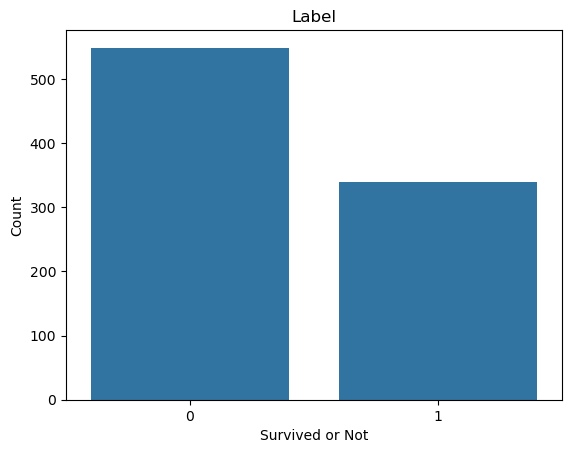

In [ ]:
# 4. 레이블 확인 (imbalanced data)

import seaborn as sns
import matplotlib.pyplot as plt

# label 시각화
sns.countplot(data = df, x="Survived")
plt.xlabel("Survived or Not")
plt.ylabel("Count")
plt.title("Label")

print(df['Survived'].value_counts())
plt.show()

In [23]:
# 5. 불필요한 컬럼 제거

# PassengerId: 단순한 식별자, 분석에 필요 없음
# Name: 이름은 생존 여부와 큰 관련이 없음
# Ticket: 티켓 번호는 랜덤성이 강해 의미 없는 경우가 많음
# Embarked: 탑승 항구는 생존율에 영향을 미치기 어렵다고 판단함 (제거 후 돌리는 것이 더 정확도가 높았음)

df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'])
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [24]:
# 6. 엔코딩(숫자)

from sklearn.preprocessing import LabelEncoder

# 변환 전
print('인코딩 전')
print(df[['Sex']].value_counts())

# 성별(Label Encoding)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# 변환 후 
print('인코딩 후')
print(df[['Sex']].value_counts())

인코딩 전
Sex   
male      577
female    312
Name: count, dtype: int64
인코딩 후
Sex
1      577
0      312
Name: count, dtype: int64


In [25]:
# 5가지 분류 (RF, DT, LR, KNN, SVM) 하고,

# accuracy 및 confusion matrix 확인

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X, y 데이터 분리
X = df.drop(columns=['Survived'])
y = df['Survived']

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 표준화 (KNN, SVM에서 필요)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RF 정확도: 0.7921
Confusion Matrix:
[[93 17]
 [20 48]]
DT 정확도: 0.7528
Confusion Matrix:
[[88 22]
 [22 46]]
LR 정확도: 0.8034
Confusion Matrix:
[[97 13]
 [22 46]]
KNN 정확도: 0.8034
Confusion Matrix:
[[95 15]
 [20 48]]
SVM 정확도: 0.8146
Confusion Matrix:
[[98 12]
 [21 47]]


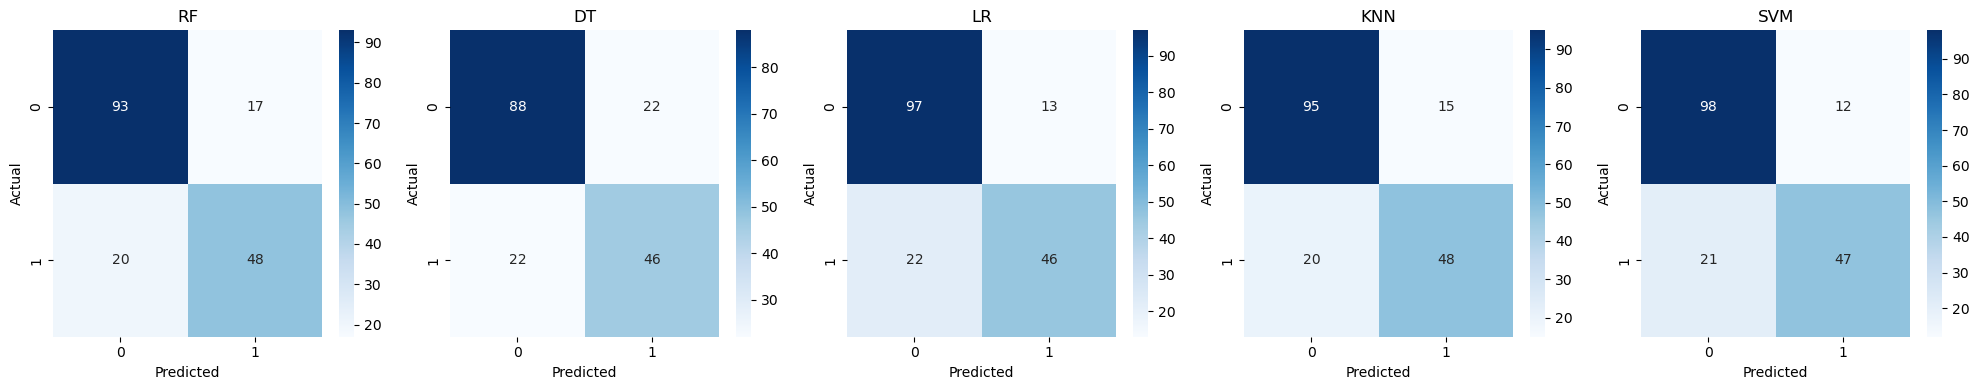

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 리스트
models = {
    "RF": RandomForestClassifier(random_state=42),
    "DT": DecisionTreeClassifier(random_state=42),
    "LR": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC()
}

# 결과 저장용
results = {}

# 각 모델 학습 및 평가
for name, model in models.items():
    if name in ["KNN", "SVM"]:  # KNN, SVM은 표준화된 데이터 사용
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # 정확도 저장
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": acc, "Confusion Matrix": confusion_matrix(y_test, y_pred)}

# 결과 출력
for name, result in results.items():
    print(f"{name} 정확도: {result['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(result['Confusion Matrix'])
    print("="*50)

# Confusion Matrix 시각화
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx, (name, result) in enumerate(results.items()):
    sns.heatmap(result["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()